In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import math
from kneed import KneeLocator
import matplotlib.transforms as mtransforms
import tensorflow as tf

In [2]:
from wnp_svm_py.solvers.methodology import compare_baselines,weighted_npsvm
from wnp_svm_py.solvers.plotgenes import plot_top_genes, plot_weights
from wnp_svm_py.solvers.parameter_search import parameters

Load data

In [3]:
# Load data
meta = pd.read_csv("H:/My Drive/KIRBY PAPERS/GSVD final Analysis/Tularensis/meta_gry.csv")
PreKingry = scipy.io.loadmat('H:/My Drive/KIRBY PAPERS/GSVD final Analysis/Tularensis/PreKingrynorm.mat') # This has been preprocessed as described in Section 3.1
Kingry = scipy.io.loadmat('H:/My Drive/KIRBY PAPERS/GSVD final Analysis/Tularensis/PreKingrynorm_min.mat') # Preprocessed Kingry solved for dimensionality reduction stage
Lungs = Kingry['A']
Spleen = Kingry['B']

Choose $\delta_1$ and $\delta_2$

delta: 0.001
10.72824569860134
9.15448649547198
delta: 0.01
10.72840591722503
9.15449306474905
delta: 0.1
10.729560245440545
9.148270208898396
delta: 1
10.773951434915693
9.078118443348195
delta: 10
10.95456897778272
6.7854390763383945
delta: 100
11.601993931820346
7.836083708170258
delta: 1000
14.014311198304
11.942662442534449


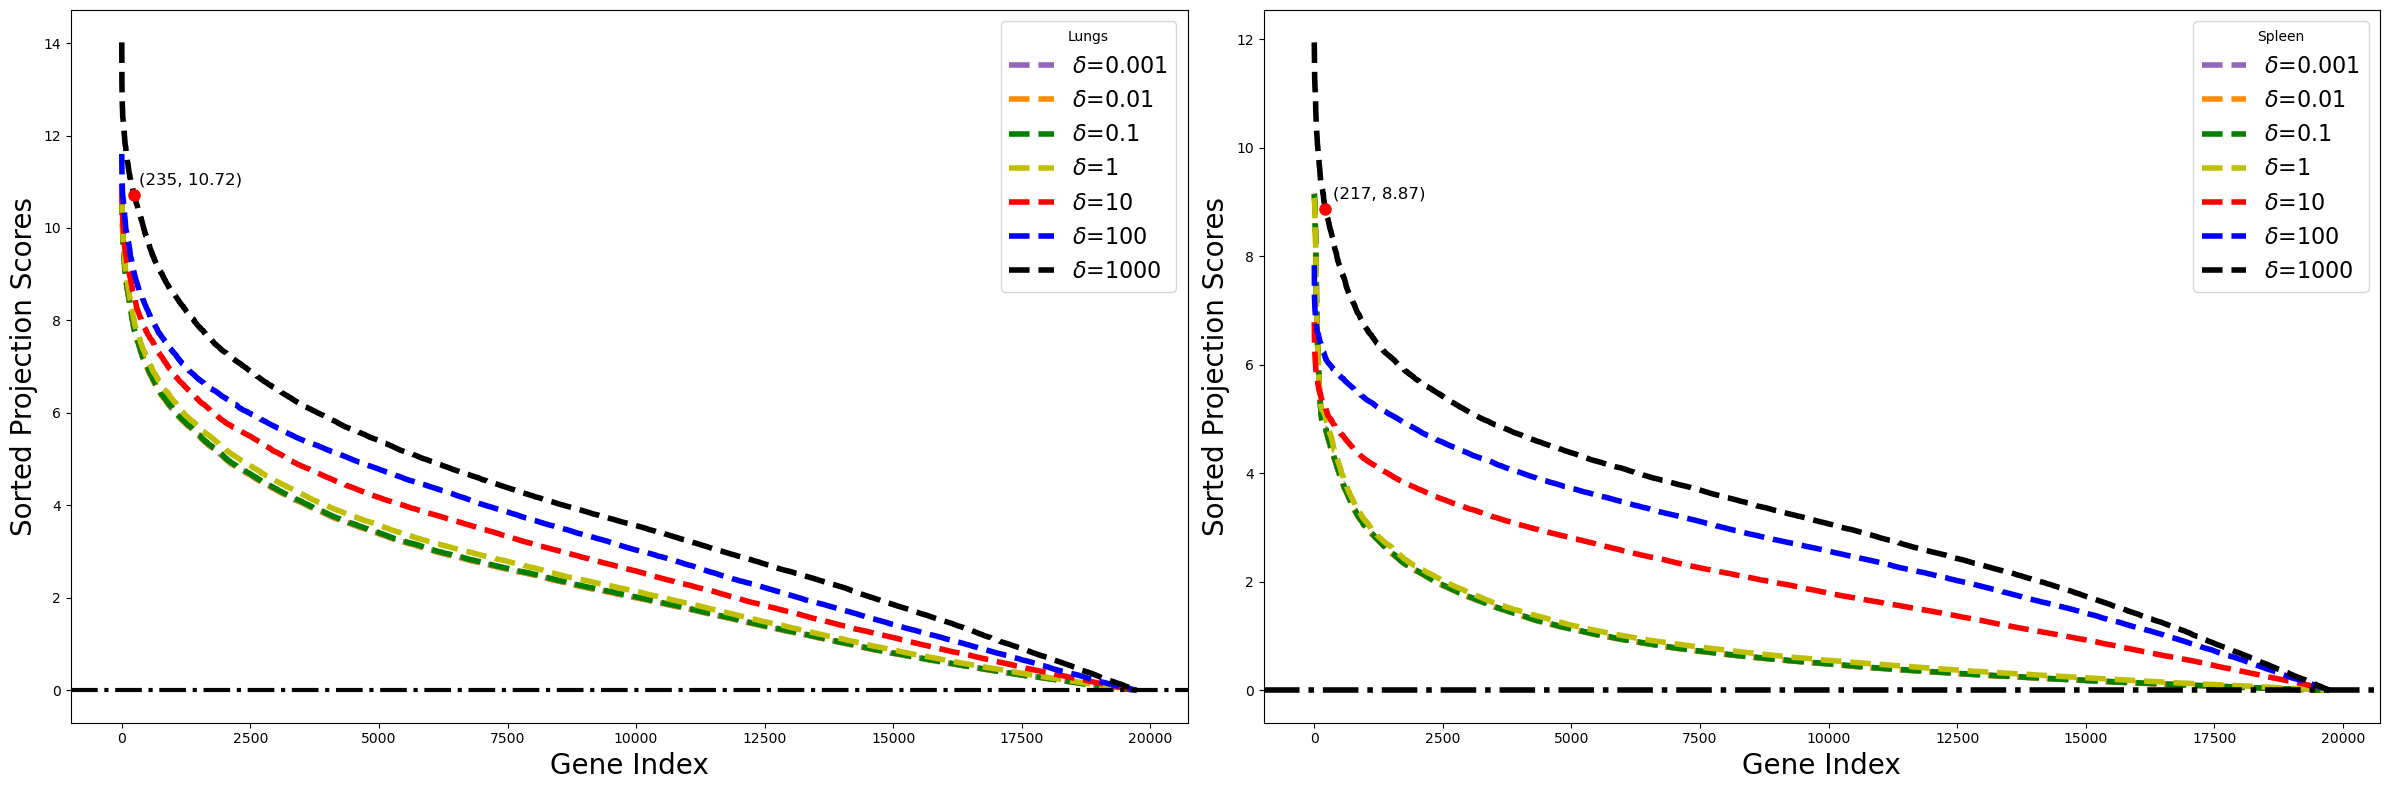

In [4]:
n = Lungs.shape[1]
np.random.seed(10)
ay0 = np.random.rand(n)
by0 = ay0
epsa = 1e-3
q = 1
s = 1
delta = [1e-3,1e-2,1e-1,1,10,100,1000]

Ap, Bp = weighted_npsvm(Lungs,Spleen,ay0,by0,epsa,delta,q,s,'delta')
color = ['tab:purple', 'darkorange', 'g', 'y', 'r', 'b', 'k']
methods = ['$\\delta$=0.001', '$\\delta$=0.01', '$\\delta$=0.1', '$\\delta$=1', '$\\delta$=10', '$\\delta$=100', '$\\delta$=1000']
plot_weights(Ap,Bp,methods,color,['Lungs','Spleen'],'lambda_sensitivity_M_s1')

Choose $\epsilon_1$ and $\epsilon_2$

epsilon: 0.1
10.954735181771957
6.7845506839213146
epsilon: 0.01
11.601875858699792
7.835623137888762
epsilon: 0.001
14.014311198304
11.942662442534449


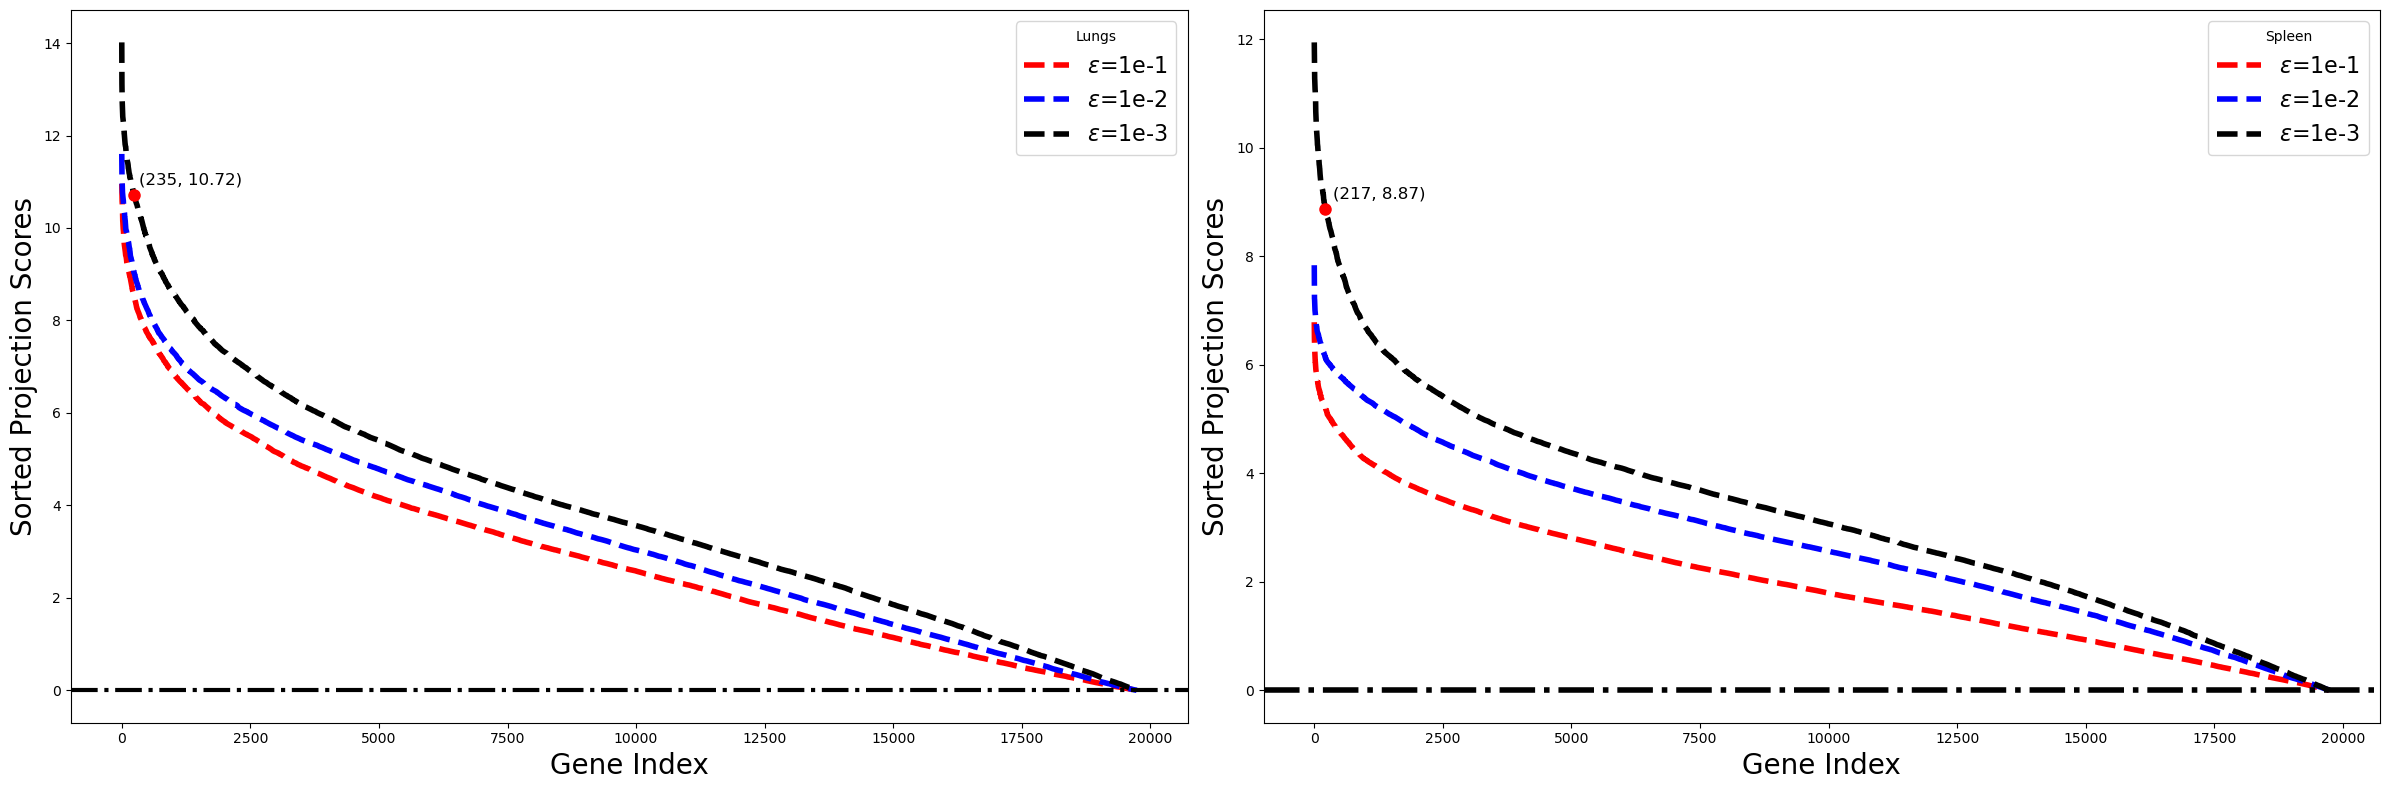

In [5]:
epsa = 1e-3
q = 1 
s = 1
delta = 1000
epsa = [1e-1,1e-2,1e-3]
Ap, Bp = weighted_npsvm(Lungs,Spleen,ay0,by0,epsa,delta,q,s,'epsilon')
c = ['r','b','k']
methods = ['$\epsilon$=1e-1','$\epsilon$=1e-2','$\epsilon$=1e-3']
plot_weights(Ap,Bp,methods,c,['Lungs','Spleen'],'epsilon_sensitivity_M_s1')

Choose parameters for the baseline models

In [ ]:
parameters(meta,Kingry)

Visualize the top genes from the Lungs and Spleen

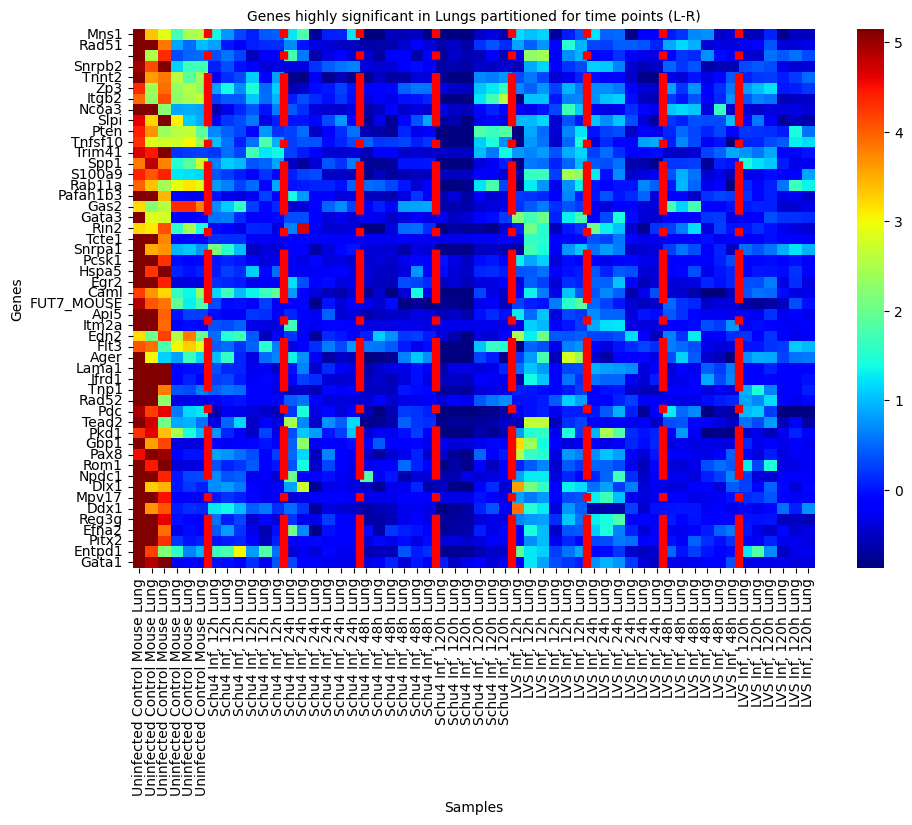

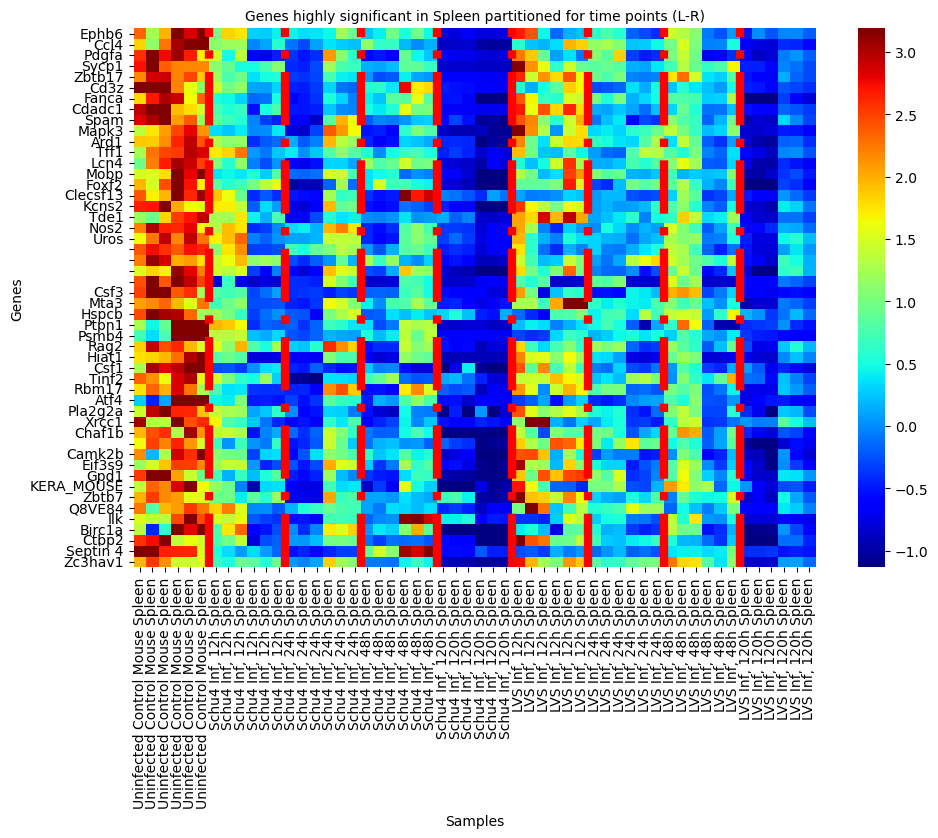

In [6]:
plot_top_genes(meta,Kingry)

Comparisons with baseline algorithms

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 88ms/step
Random Forest: 0.8125
[[ 6  0]
 [ 9 15]]
Logistic Regression: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
SVM: 0.875
[[ 6  0]
 [ 6 18]]
Decision Tree: 0.6041666666666666
[[ 4  2]
 [11 13]]
Naive Bayes: 0.7291666666666666
[[ 6  0]
 [13 11]]
KNN: 0.8125
[[ 6  0]
 [ 9 15]]
Adaboost: 0.8958333333333333
[[ 6  0]
 [ 5 19]]
Gradientboost: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Xgradientboost: 0.75
[[ 6  0]
 [12 12]]
ANN: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9166666666666667
[[ 6  0]
 [ 4 20]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9166666666666667
[[ 6  0]
 [ 4 20]]
$\ell_1$-WNPSVM ($M = I$): 0.875
[[ 5  1]
 [ 2 22]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})^2$): 0.7708333333333333
[[ 4  2]
 [ 3 21]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})$): 0.875
[[ 5  1]
 [ 2 22]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,0.1}(\mathbf{z})$): 0.7708333333333333
[[ 4  2]
 [ 3

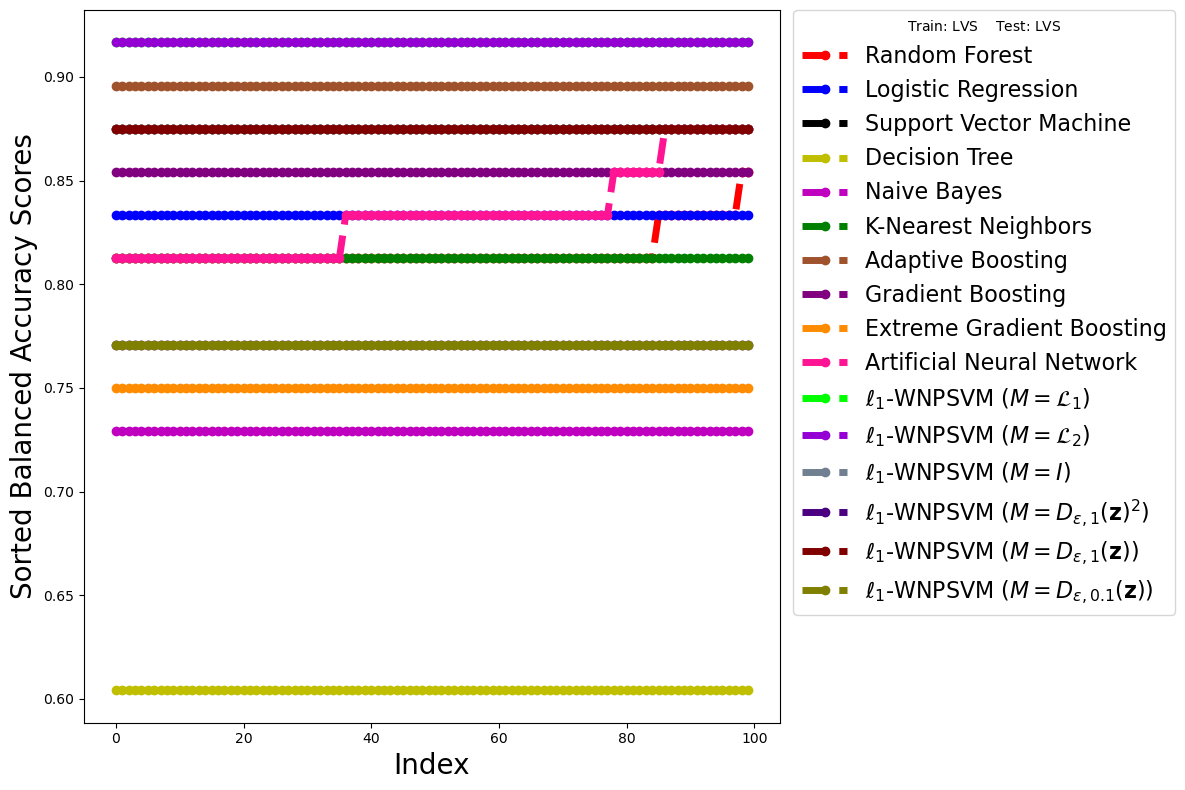

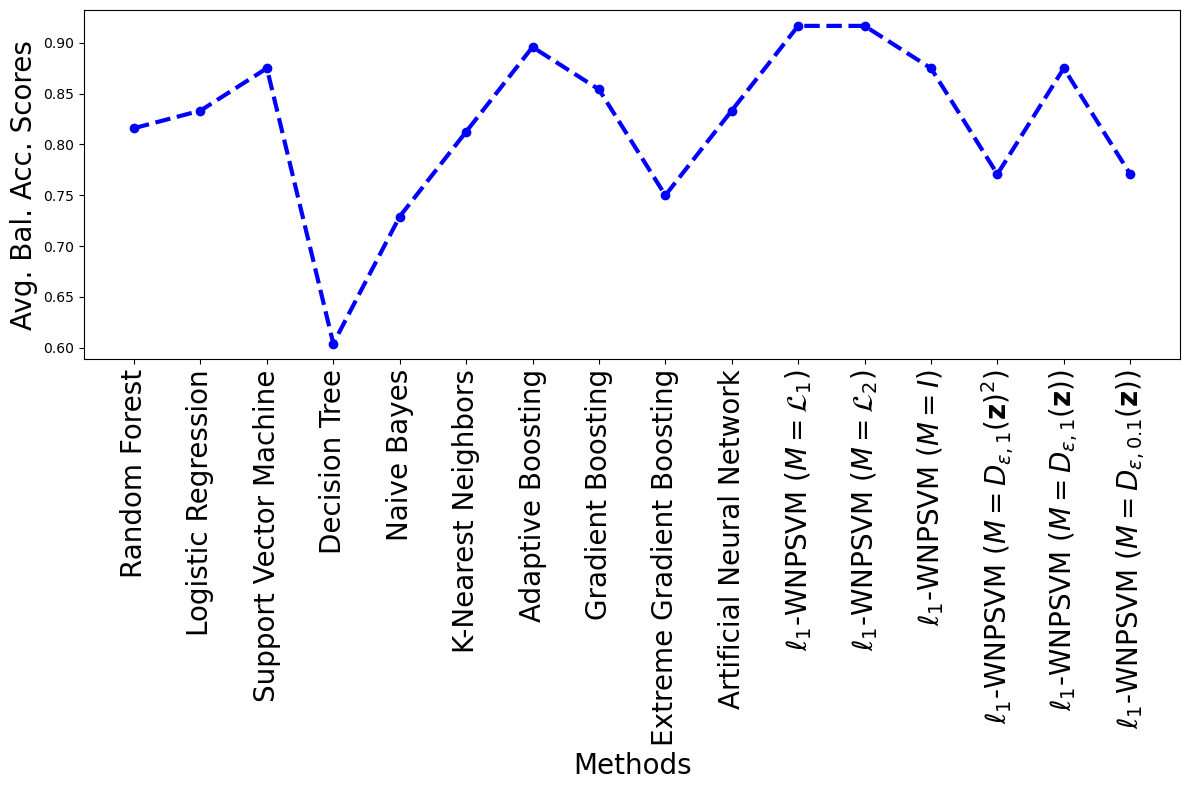

In [4]:
compare_baselines(Kingry,235,100,'Schu4','Schu4')

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 65ms/step
Random Forest: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Logistic Regression: 0.8125
[[ 6  0]
 [ 9 15]]
SVM: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Decision Tree: 0.5833333333333333
[[ 4  2]
 [12 12]]
Naive Bayes: 0.7916666666666667
[[ 6  0]
 [10 14]]
KNN: 0.8125
[[ 6  0]
 [ 9 15]]
Adaboost: 0.875
[[ 6  0]
 [ 6 18]]
Gradientboost: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
Xgradientboost: 0.8125
[[ 6  0]
 [ 9 15]]
ANN: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9791666666666667
[[ 6  0]
 [ 1 23]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9791666666666667
[[ 6  0]
 [ 1 23]]
$\ell_1$-WNPSVM ($M = I$): 0.9791666666666667
[[ 6  0]
 [ 1 23]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})^2$): 0.9791666666666667
[[ 6  0]
 [ 1 23]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})$): 0.9791666666666667
[[ 6  0]
 [ 1 23]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,0.1}(\mathbf{z})$): 0.97

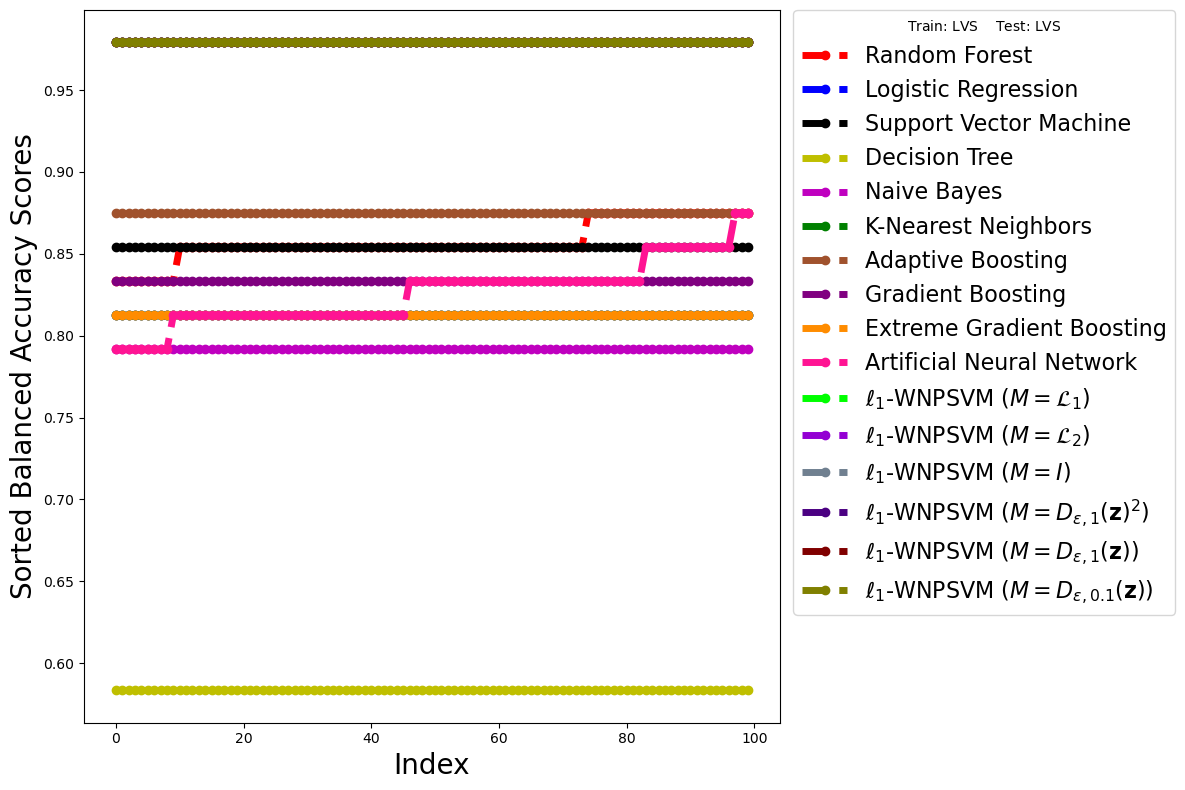

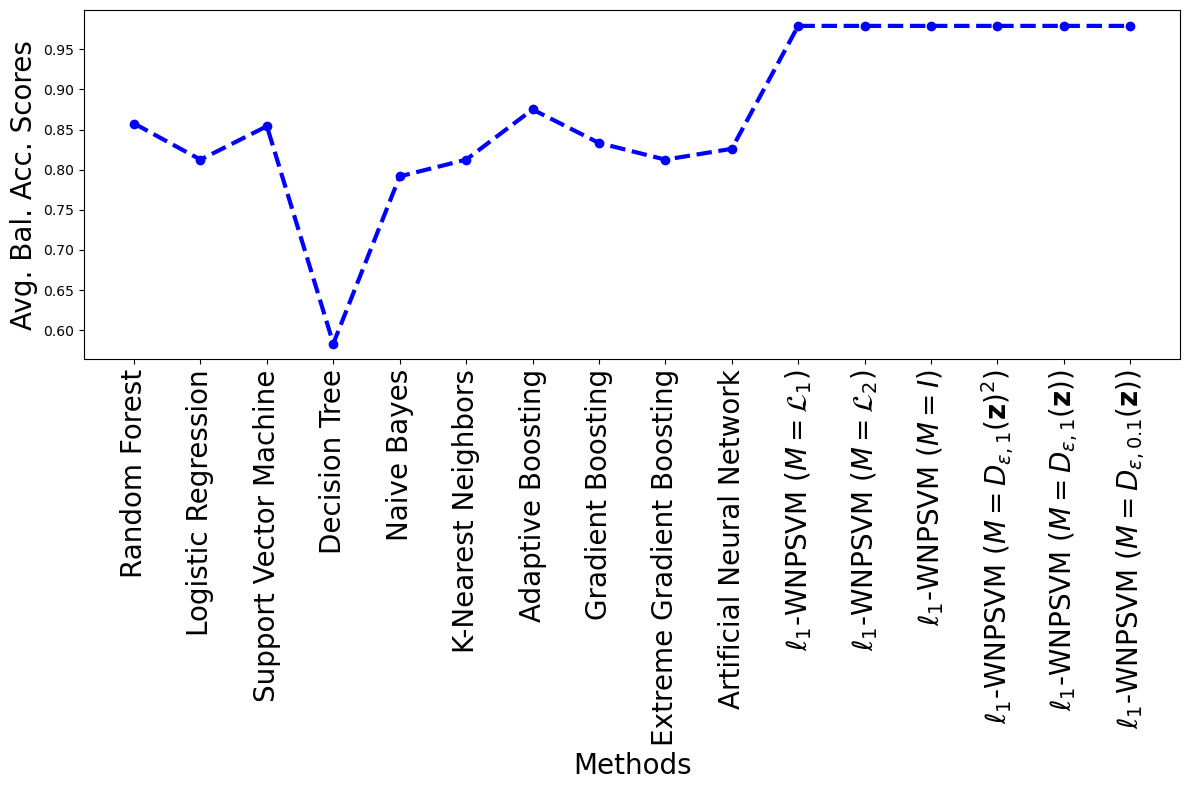

In [5]:
compare_baselines(Kingry,235,100,'Schu4','LVS')

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 67ms/step
Random Forest: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
Logistic Regression: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
SVM: 0.875
[[ 6  0]
 [ 6 18]]
Decision Tree: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Naive Bayes: 0.7708333333333333
[[ 6  0]
 [11 13]]
KNN: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Adaboost: 0.875
[[ 6  0]
 [ 6 18]]
Gradientboost: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Xgradientboost: 0.875
[[ 6  0]
 [ 6 18]]
ANN: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9166666666666667
[[ 6  0]
 [ 4 20]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9375
[[ 6  0]
 [ 3 21]]
$\ell_1$-WNPSVM ($M = I$): 0.9166666666666667
[[ 5  1]
 [ 0 24]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})^2$): 0.8958333333333334
[[ 5  1]
 [ 1 23]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})$): 0.9166666666666667
[[ 5  1]
 [ 0 24]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,0.1}(\mathbf{z})$): 0.9166

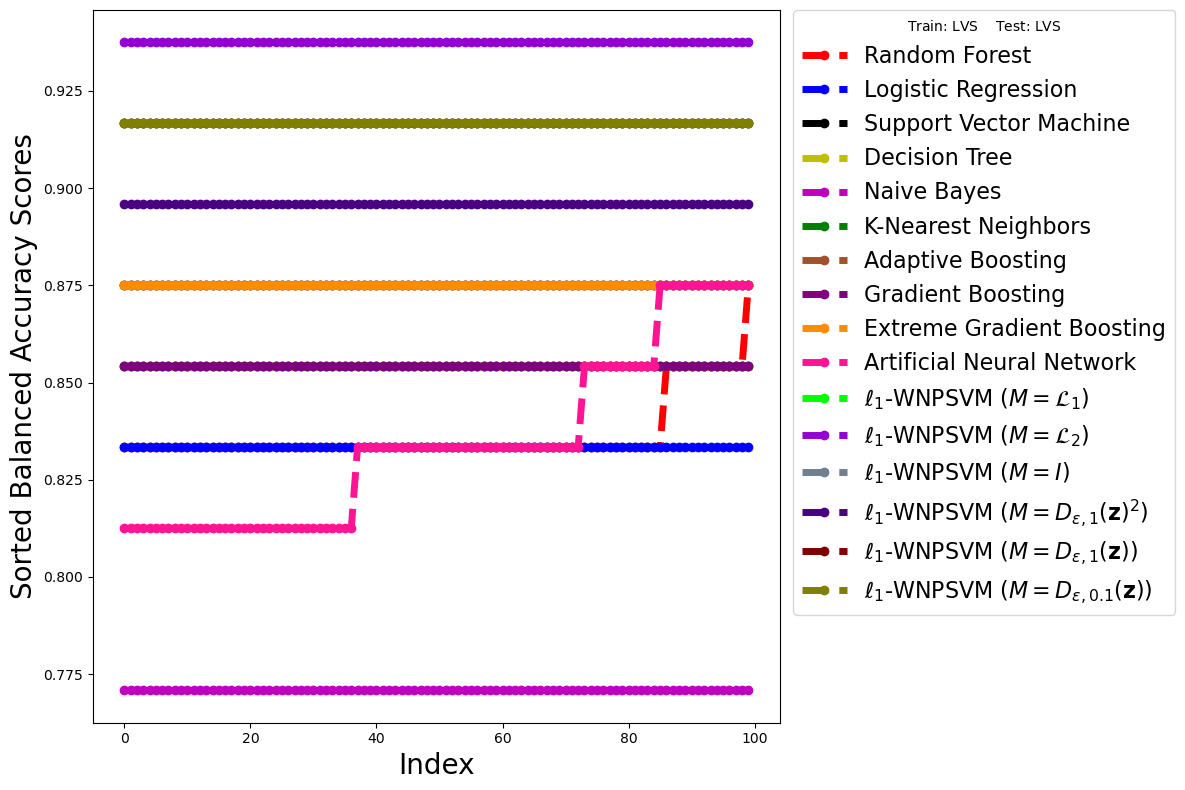

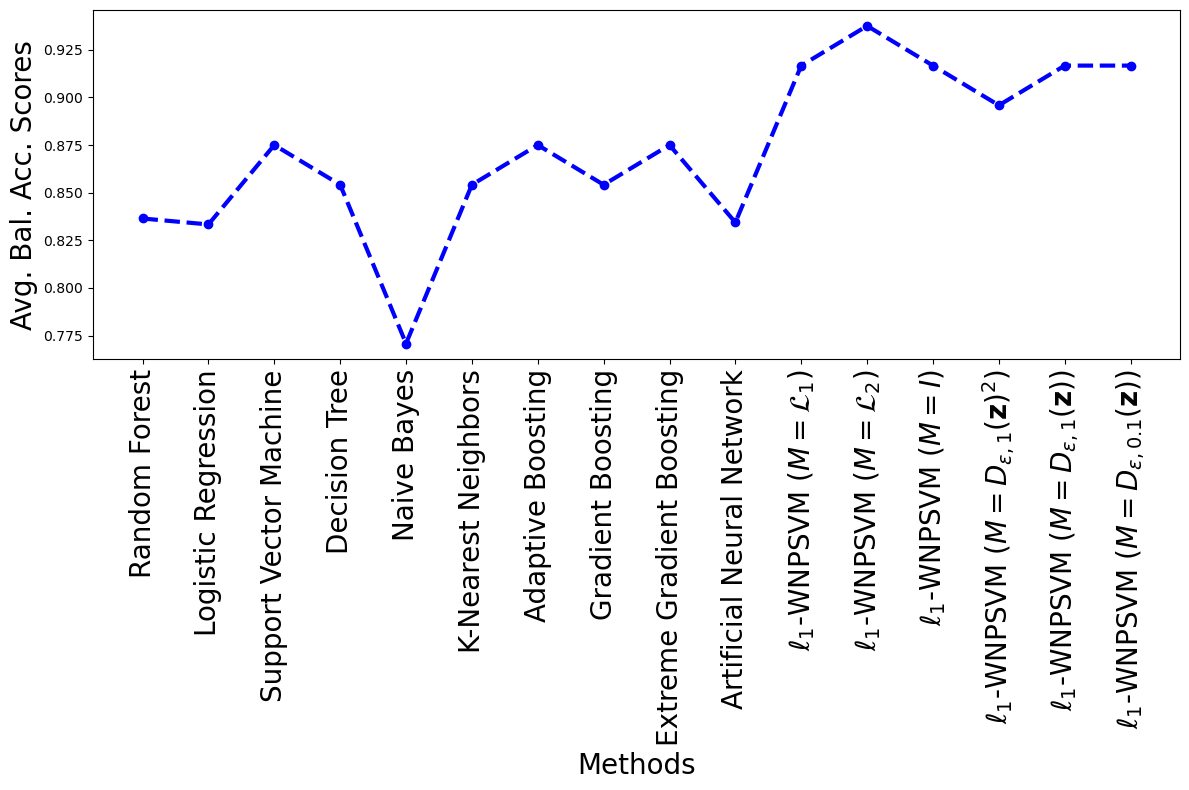

In [6]:
compare_baselines(Kingry,235,100,'LVS','Schu4')

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 67ms/step
Random Forest: 0.875
[[ 6  0]
 [ 6 18]]
Logistic Regression: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
SVM: 0.875
[[ 6  0]
 [ 6 18]]
Decision Tree: 0.8958333333333333
[[ 6  0]
 [ 5 19]]
Naive Bayes: 0.7916666666666667
[[ 6  0]
 [10 14]]
KNN: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Adaboost: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
Gradientboost: 0.8541666666666667
[[ 6  0]
 [ 7 17]]
Xgradientboost: 0.8958333333333333
[[ 6  0]
 [ 5 19]]
ANN: 0.8333333333333333
[[ 6  0]
 [ 8 16]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9583333333333333
[[ 6  0]
 [ 2 22]]
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9583333333333333
[[ 6  0]
 [ 2 22]]
$\ell_1$-WNPSVM ($M = I$): 0.8541666666666667
[[ 5  1]
 [ 3 21]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})^2$): 0.9583333333333333
[[ 6  0]
 [ 2 22]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,1}(\mathbf{z})$): 0.8541666666666667
[[ 5  1]
 [ 3 21]]
$\ell_1$-WNPSVM ($M = D_{\epsilon,0

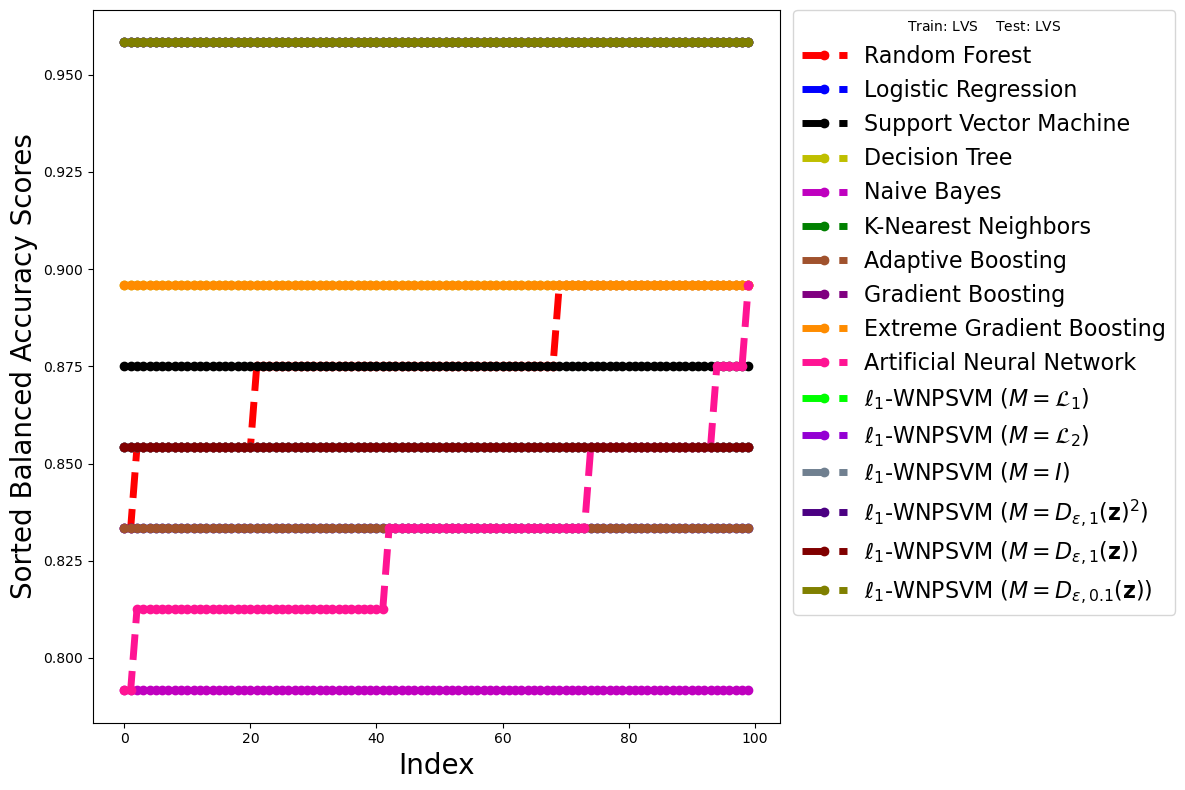

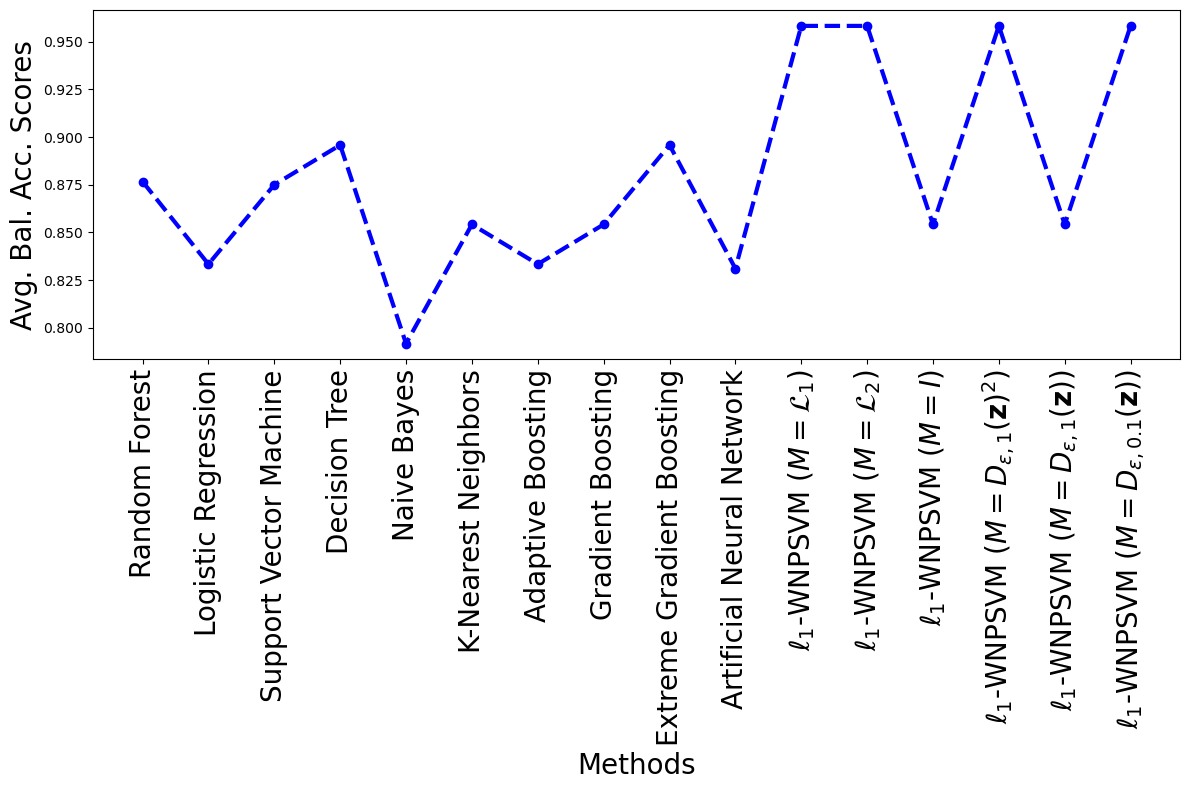

In [7]:
compare_baselines(Kingry,235,100,'LVS','LVS')